In [1]:
%matplotlib inline

In [2]:
import numpy as np
from astropy import units as u
from astropy import stats

In [3]:
import pylab as pl
pl.rcParams['figure.figsize'] = (20,8)

In [4]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import warnings
import spectral_cube
warnings.filterwarnings(action='ignore', category=spectral_cube.utils.StokesWarning)
warnings.filterwarnings(action='ignore', category=spectral_cube.utils.BeamWarning)

In [5]:
import os
os.chdir("/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

In [6]:
ls -lhrtd W51-E_B6_clean_mask.mask

drwxr-xr-x 3 aginsbur observer 33K Mar 14 15:13 W51-E_B6_clean_mask.mask/


This custom mask was produced based on the first iteration of cleaning.  The rectangular structures suggest that the thresholds in the individual regions were too deep.

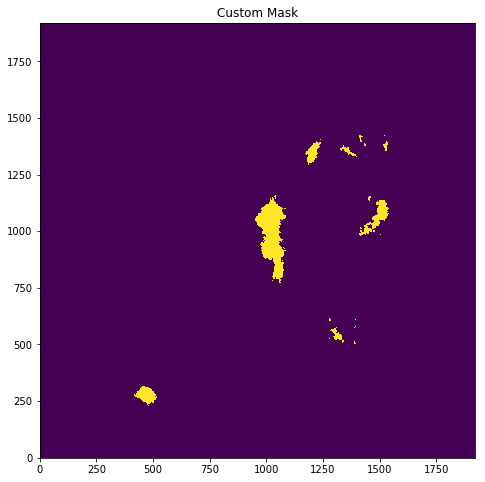

In [7]:
mask = SpectralCube.read('W51-E_B6_clean_mask.mask', format='casa_image')[0]
pl.imshow(mask.value, origin='lower', interpolation='none')
pl.title("Custom Mask")

In [8]:
imgs_dirty_b6, cubes_dirty_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_dirty')

In [9]:
imgs_before_b6, cubes_before_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0')

In [10]:
imgs_after_b6, cubes_after_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal1')

In [11]:
imgs_after2_b6, cubes_after2_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal2')

In [12]:
imgs_after3_b6, cubes_after3_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal3')

In [13]:
imgs_after4_b6, cubes_after4_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal4')

In [14]:
imgs_after5_b6, cubes_after5_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal5')

In [15]:
imgs_after6_b6, cubes_after6_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal6')

In the images below, the white contours show the mask.

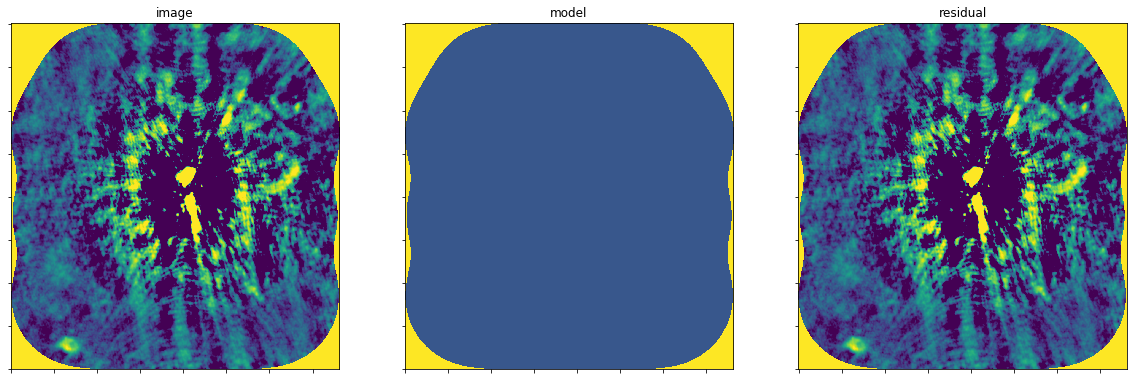

In [16]:
show(imgs_dirty_b6, vmin=-0.001, vmax=0.01)

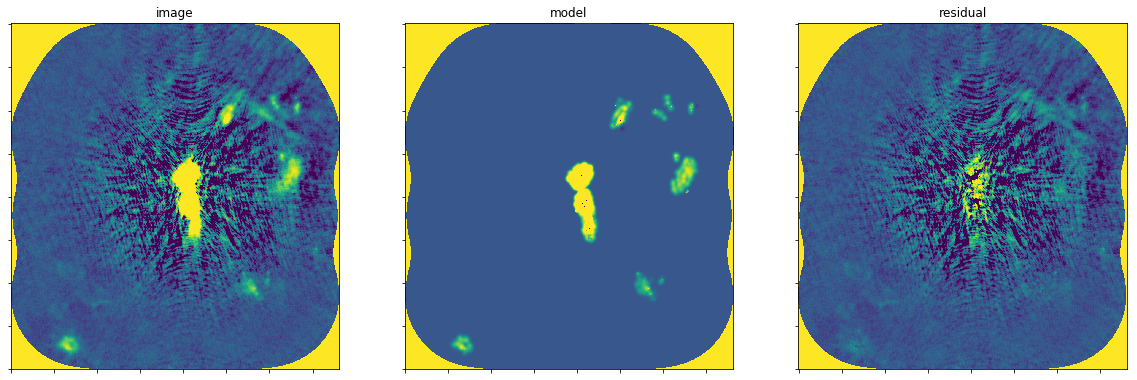

In [17]:
show(imgs_before_b6, vmin=-0.001, vmax=0.01)

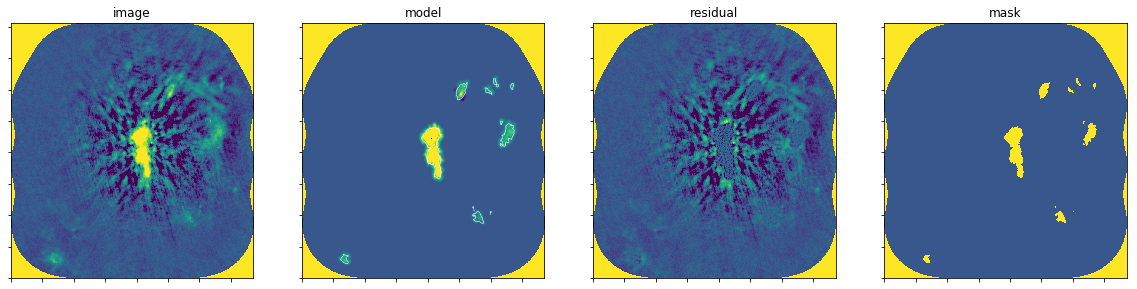

In [18]:
show(imgs_after_b6, vmin=-0.001, vmax=0.01)

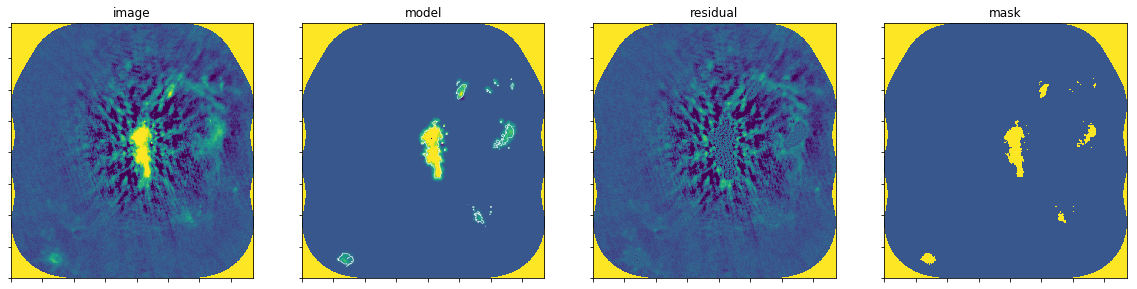

In [19]:
show(imgs_after2_b6, vmin=-0.001, vmax=0.01)

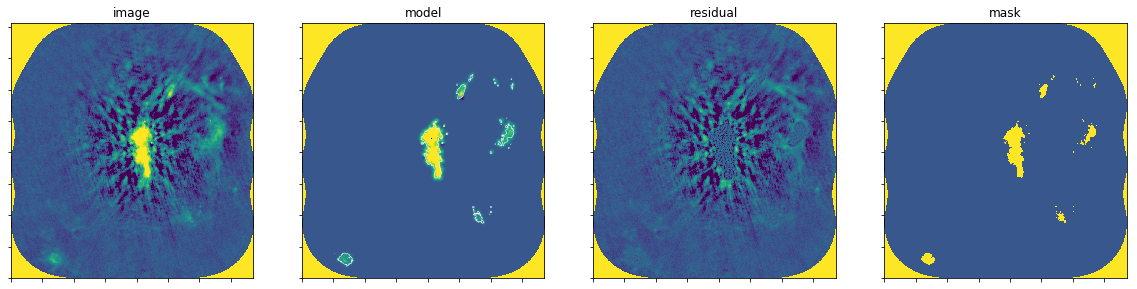

In [20]:
show(imgs_after3_b6, vmin=-0.001, vmax=0.01)

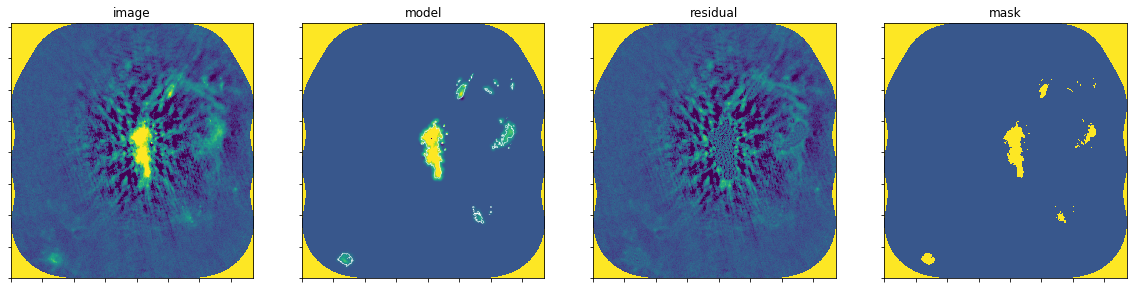

In [21]:
show(imgs_after4_b6, vmin=-0.001, vmax=0.01)

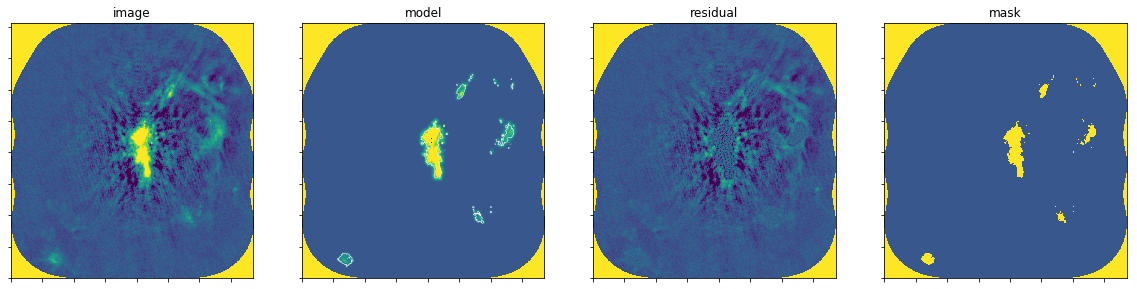

In [22]:
show(imgs_after5_b6, vmin=-0.001, vmax=0.01)

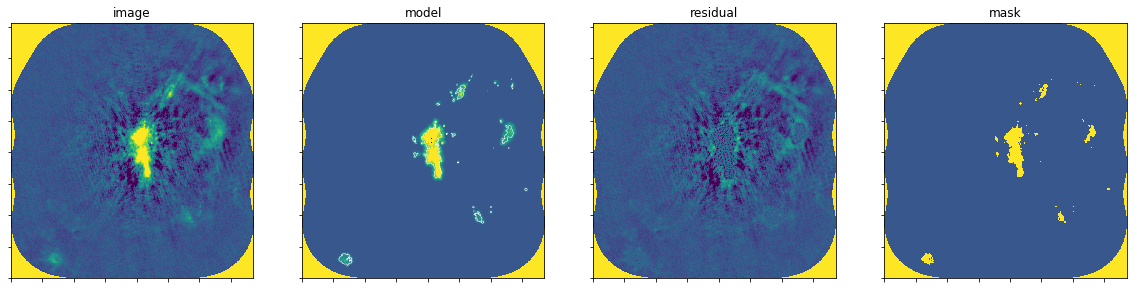

In [23]:
show(imgs_after6_b6, vmin=-0.001, vmax=0.01)

# Before vs. after 4x phase 2x amp self-cal

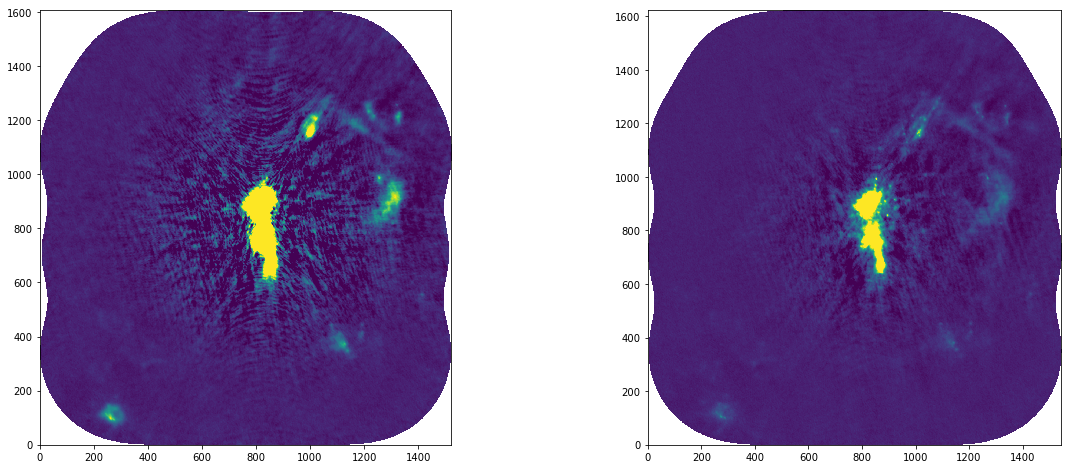

In [24]:
pl.subplot(1,2,1).imshow(imgs_before_b6['image'].value, origin='lower', vmin=-0.001, vmax=0.01)
pl.subplot(1,2,2).imshow(imgs_after6_b6['image'].value, origin='lower', vmin=-0.001, vmax=0.01)
#pl.subplot(1,3,3).imshow(imgs_after5_b6['image'].value-imgs_before_b6['image'].value, origin='lower', vmin=-0.01, vmax=0.01)

### Zoom-in panel discussion

These are the same images as shown above, but now zoomed in on the central regions with a higher peak intensity.

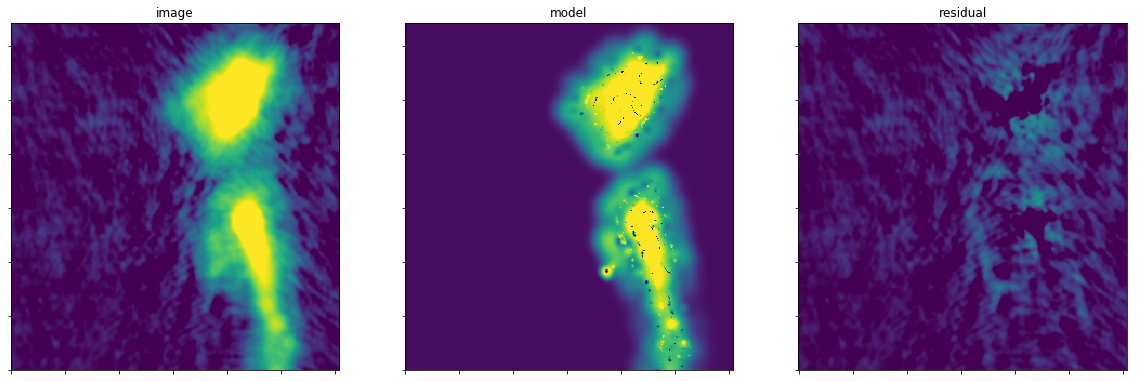

In [25]:
show(imgs_before_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

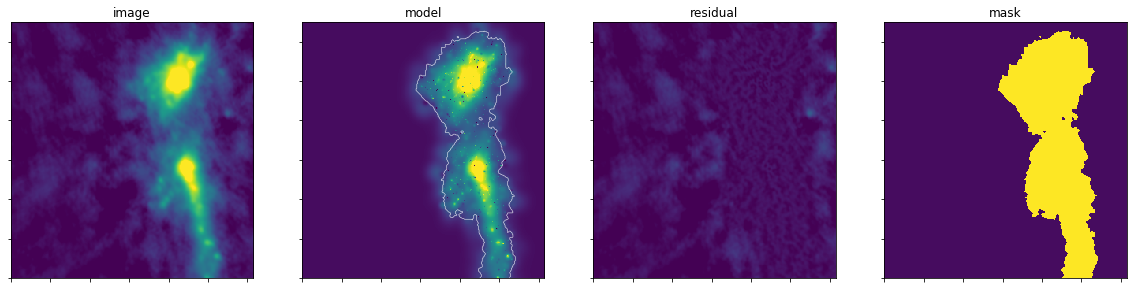

In [26]:
show(imgs_after_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

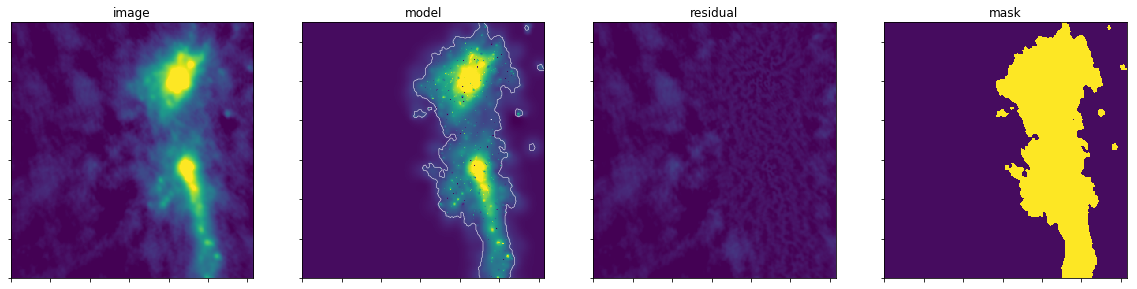

In [27]:
show(imgs_after2_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

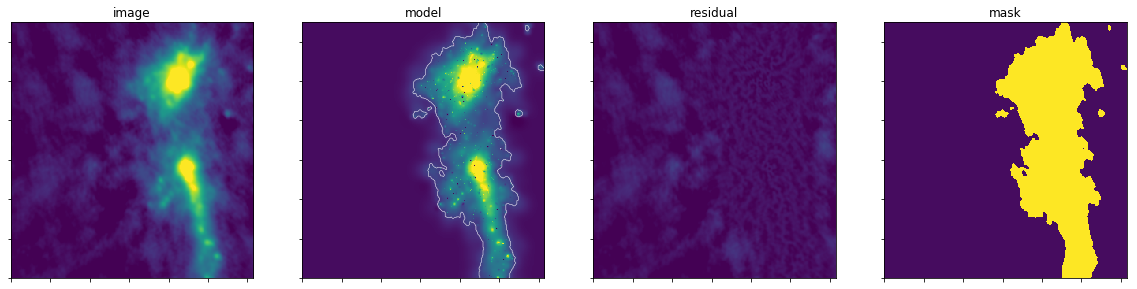

In [28]:
show(imgs_after3_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

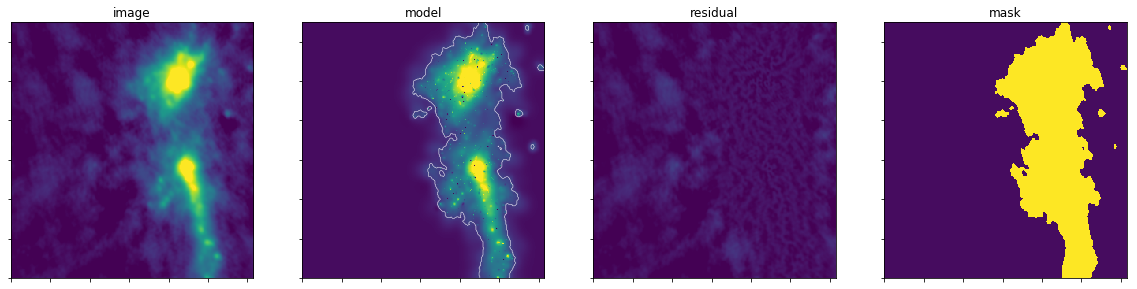

In [29]:
show(imgs_after4_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

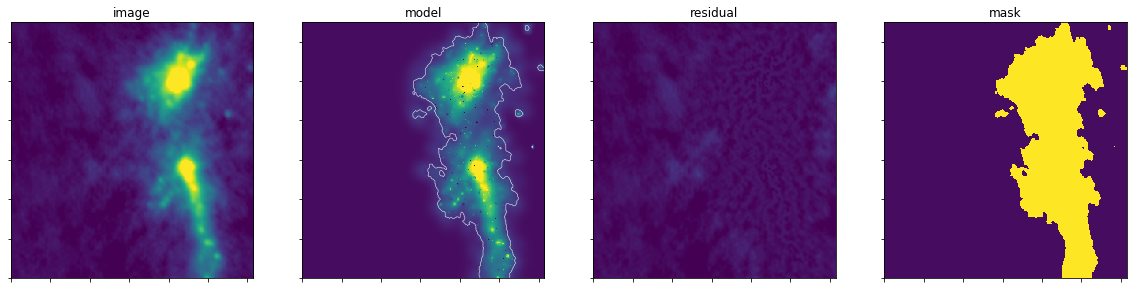

In [30]:
show(imgs_after5_b6, vmin=-0.001, vmax=0.1, zoom=0.2)

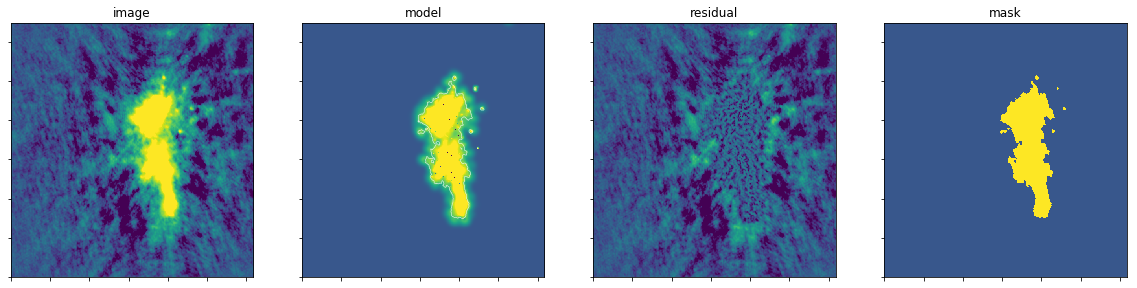

In [31]:
show(imgs_after5_b6, vmin=-0.001, vmax=0.01, zoom=0.4)

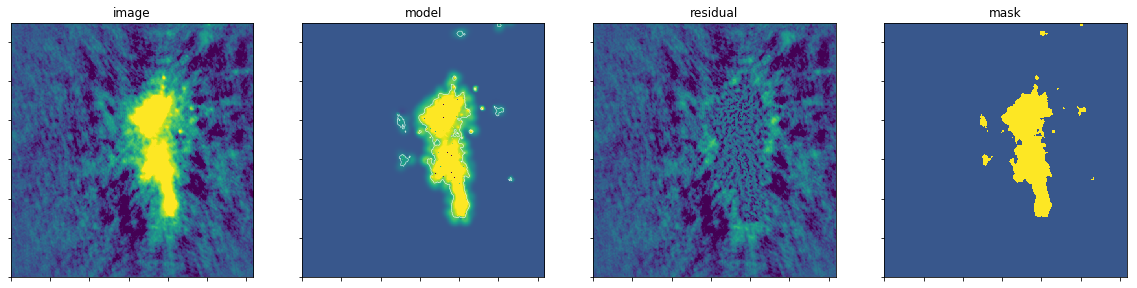

In [32]:
show(imgs_after6_b6, vmin=-0.001, vmax=0.01, zoom=0.4)

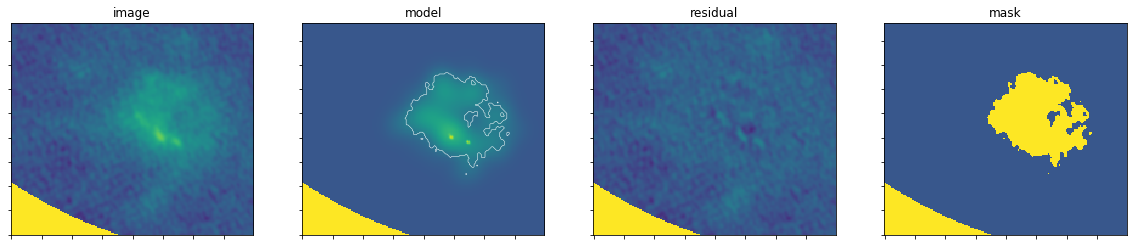

In [33]:
show(imgs_after6_b6, vmin=-0.001, vmax=0.01, zoom=[slice(25,200), slice(150,350)])

## Measurements of the peak-to-RMS ratio and RMS in each stage:

In [34]:
for imgs in (imgs_before_b6, imgs_after_b6, imgs_after2_b6, imgs_after3_b6, imgs_after4_b6, imgs_after5_b6, imgs_after6_b6):
    rms = np.nanstd(imgs['residual'].value*u.Jy/u.beam) # residual has bad header units
    peak = np.nanmax(imgs['image'].quantity)
    rms2 = stats.mad_std(imgs['image'].quantity, ignore_nan=True)
    beam = imgs['image'].beam
    print(f"peak/rms={peak/rms:6.1f}, peak/mad={peak/rms2:6.1f}, peak={peak:0.3f}, rms={rms:0.5f}, mad={rms2:0.5f},"
          f" beam={beam.major:0.2f}x{beam.minor:0.2f}")

peak/rms= 500.1, peak/mad=2451.7, peak=0.836 Jy / beam, rms=0.00167 Jy / beam, mad=0.00034 Jy / beam, beam=0.59 arcsecx0.50 arcsec
peak/rms= 831.3, peak/mad=1738.7, peak=0.449 Jy / beam, rms=0.00054 Jy / beam, mad=0.00026 Jy / beam, beam=0.35 arcsecx0.28 arcsec
peak/rms= 953.8, peak/mad=1880.0, peak=0.472 Jy / beam, rms=0.00049 Jy / beam, mad=0.00025 Jy / beam, beam=0.35 arcsecx0.28 arcsec
peak/rms= 945.0, peak/mad=1889.9, peak=0.472 Jy / beam, rms=0.00050 Jy / beam, mad=0.00025 Jy / beam, beam=0.35 arcsecx0.28 arcsec
peak/rms= 955.5, peak/mad=1893.9, peak=0.472 Jy / beam, rms=0.00049 Jy / beam, mad=0.00025 Jy / beam, beam=0.35 arcsecx0.28 arcsec
peak/rms=1385.3, peak/mad=2352.1, peak=0.472 Jy / beam, rms=0.00034 Jy / beam, mad=0.00020 Jy / beam, beam=0.35 arcsecx0.28 arcsec
peak/rms=1418.7, peak/mad=2375.1, peak=0.479 Jy / beam, rms=0.00034 Jy / beam, mad=0.00020 Jy / beam, beam=0.35 arcsecx0.28 arcsec


The RMS is shrinking overall and the peak is rising, which is good.

For our records, we want to know what imaging parameters were used for these images:

In [35]:
import casatools
ia = casatools.image()
for suffix in ("","_selfcal1","_selfcal2","_selfcal3","_selfcal4","_selfcal5","_selfcal6"):
    ia.open('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0{0}.image.tt0'.format(suffix))
    print(suffix, ia.history())
    ia.close()

 ['niter: 10000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal1 ['niter: 10000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal2 ['niter: 10000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal3 ['niter: 10000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal4 ['niter: 10000', 'deconvolver: mtmfs', 'scales: [0, 3, 9, 27]', 'pblimit: 0.1', 'weighting: briggs', 'specmode: mfs', 'nterms: 2', 'threshold: 1mJy', 'robust: 0', 'gridder: mosaic']
_selfcal5 ['niter: 10000', 'deconvolver: mtmfs', 

# Final iteration, robust 2 and robust -2

In [36]:
imgs_after6_b6_r2, cubes_after6_b6_r2 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust2_selfcal6')

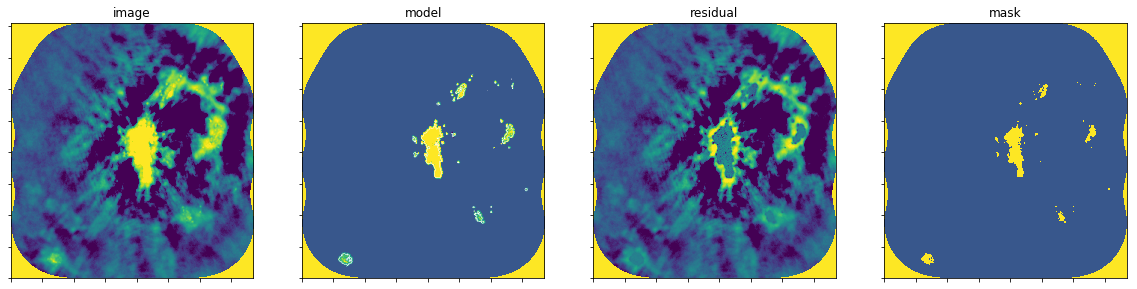

In [37]:
show(imgs_after6_b6_r2, vmin=-0.001, vmax=0.01)

In [38]:
imgs_after6_b6_rm2, cubes_after6_b6_rm2 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust-2_selfcal6')

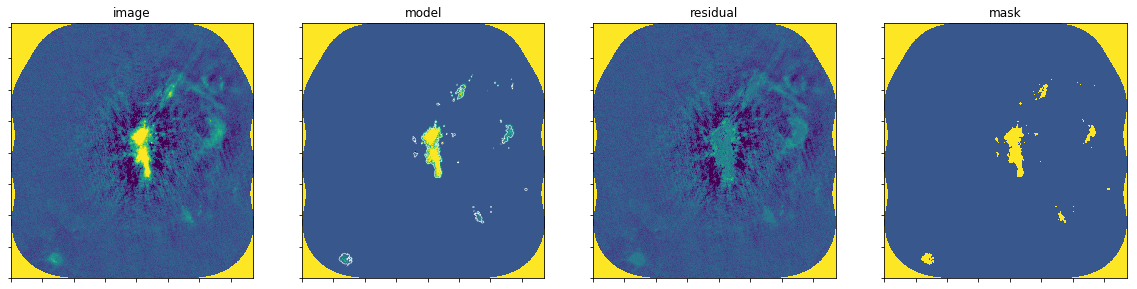

In [39]:
show(imgs_after6_b6_rm2, vmin=-0.001, vmax=0.01)

# What happens if we clean much, much deeper?

Is there any benefit to doing a super-deep clean and including _everything_ in the model?  (probably not)

In [40]:
imstoodeep, cubestoodeep = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_toodeep')

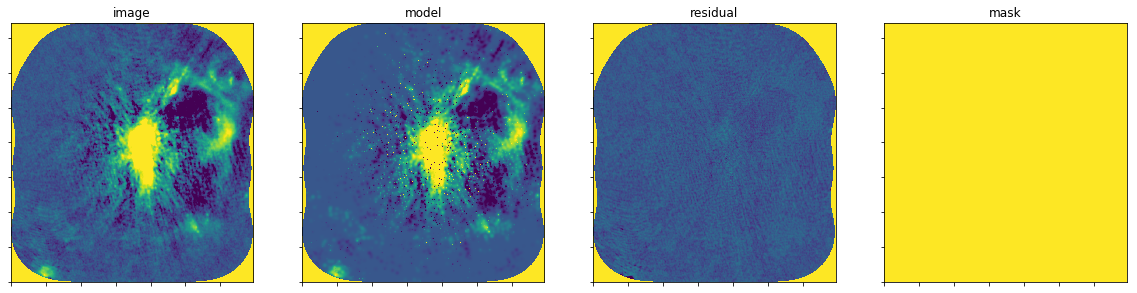

In [41]:
show(imstoodeep, vmin=-0.001, vmax=0.01)

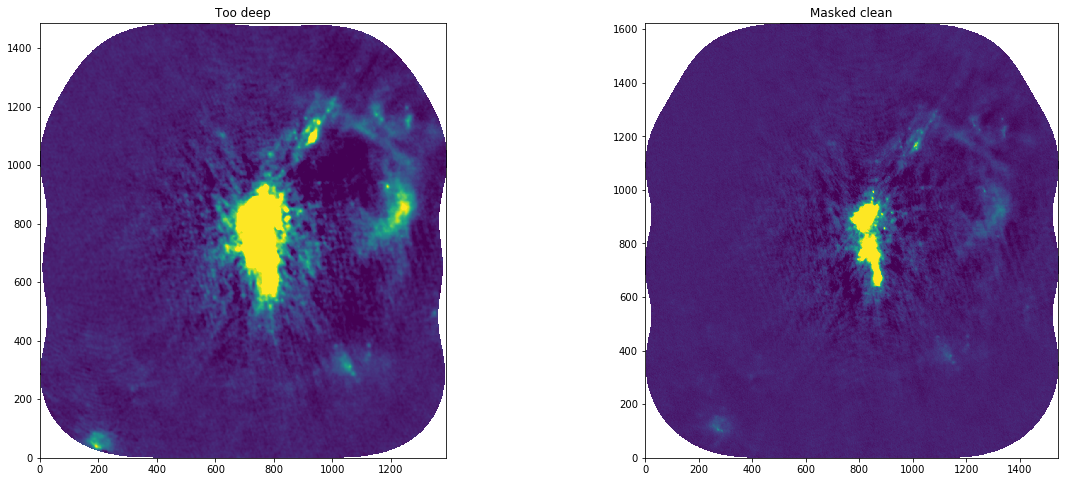

In [44]:
pl.subplot(1,2,1).imshow(imstoodeep['image'].value, origin='lower', vmin=-0.001, vmax=0.01); pl.title("Too deep")
pl.subplot(1,2,2).imshow(imgs_after6_b6['image'].value, origin='lower', vmin=-0.001, vmax=0.01); pl.title("Masked clean")

## Difference between (masked clean) - (too-deep, no-mask clean)

The too-deep clean recovers a lot more extended structure, so it _might_ be right for the extended HII region, but it also creates negative bowls.

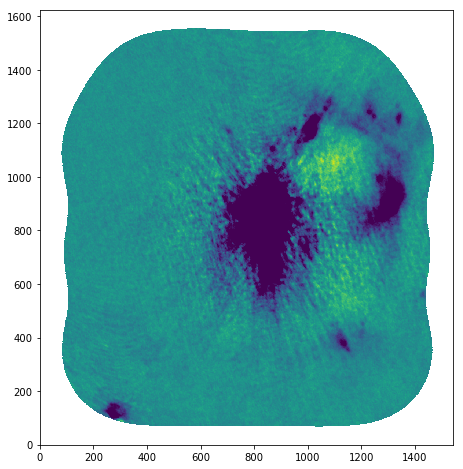

In [45]:
pl.gca().imshow(imgs_after6_b6['image'].value-imstoodeep['image'].reproject(imgs_after6_b6['image'].header).value, origin='lower', vmin=-0.003, vmax=0.003)